### ISC among twins and control analyses

The goal of this notebook is to measure ISC among twins and compare it against control-twins (i.e. age- and sex-matched controls) non-twins.

#### Import modules

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys, os, nilearn, pickle, glob, shutil, itertools, random, tqdm
import sys
sys.path.insert(1, '../')
import numpy as np
import pandas as pd
from statsmodels.stats.multitest import multipletests
from utils import *
import warnings
from tqdm import tqdm
warnings.simplefilter("ignore")

n_regions = 293

#### Reading in Twin-List and computing ISC among real-twins

In [2]:
twin_df = pd.read_csv('../../data/00_dataset_info/twin_df.csv')
twin_list = twin_df[['twin_A_id','twin_B_id']].values.tolist()
print(twin_list[:3])

twin_df.head() #'''
print(' ')

[['sub-0001', 'sub-0018'], ['sub-0003', 'sub-0233'], ['sub-0004', 'sub-0420']]
 


In [3]:
#'''
# Computing ISC for the real twins
n_twins       = len(twin_list)
iscs_reg_twin = np.zeros((n_regions+1, n_twins))

for curr_region in tqdm(range(n_regions)):
    twin_iscs = []
    
    for twin_pair in twin_list:
        filename_1 = '../../data/03_extract_ts_aus/' + twin_pair[0] + '_LTR_Z_THP001_LP012_shen268_pauli16_aan9.npy'
        twin1_data = np.load(filename_1) 
        filename_2 = '../../data/03_extract_ts_aus/' + twin_pair[1] + '_LTR_Z_THP001_LP012_shen268_pauli16_aan9.npy'
        twin2_data = np.load(filename_2) 
        
        twin_iscs.append(np.corrcoef(twin1_data[:,curr_region], twin2_data[:,curr_region])[0,1])
 
    iscs_reg_twin[curr_region, :]   = twin_iscs #'''
    

#anatomical similarity
'''
anatomical_similarity_twins = []
for twin_pair in tqdm(twin_list):
        file_a = twin_pair[0]
        file_b = twin_pair[1] 

        f1  = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f1m = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f1_masked = apply_mask(f1, compute_brain_mask(f1m, threshold=0.01, mask_type='whole-brain'))

        f2  = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f2m = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f2_masked = apply_mask(f2, compute_brain_mask(f2m, threshold=0.01, mask_type='whole-brain'))

        anatomical_similarity_twins.append(np.corrcoef(f1_masked, f2_masked)[0,1])

iscs_reg_twin[293,:] = np.asarray(anatomical_similarity_twins) #'''
print(' ')

100%|█████████████████████████████████████████| 293/293 [00:18<00:00, 15.90it/s]

#### Reading in ControlTwin-List and computing ISC among control-twins

In [4]:
controltwin_df = pd.read_csv('../../data/00_dataset_info/matched_controltwin_df.csv')
controltwin_list = controltwin_df[['twin_A_id','controltwin_B_id']].values.tolist()
print(controltwin_list[:3])

controltwin_df.head() #'''
print(' ')

[['sub-0001', 'sub-0003'], ['sub-0004', 'sub-0151'], ['sub-0005', 'sub-0043']]
 


In [5]:
#'''
# Computing ISC for the control twins
n_controltwins       = len(twin_list)
iscs_reg_controltwin = np.zeros((n_regions+1, n_controltwins))

for curr_region in tqdm(range(n_regions)):
    controltwin_iscs = []
    
    for controltwin_pair in controltwin_list:
        filename_1 = '../../data/03_extract_ts_aus/' + controltwin_pair[0] + '_LTR_Z_THP001_LP012_shen268_pauli16_aan9.npy'
        controltwin1_data = np.load(filename_1) 
        filename_2 = '../../data/03_extract_ts_aus/' + controltwin_pair[1] + '_LTR_Z_THP001_LP012_shen268_pauli16_aan9.npy'
        controltwin2_data = np.load(filename_2) 
        
        controltwin_iscs.append(np.corrcoef(controltwin1_data[:,curr_region], controltwin2_data[:,curr_region])[0,1])
 
    iscs_reg_controltwin[curr_region, :]   = controltwin_iscs #'''
    

#anatomical similarity
'''
anatomical_similarity_controltwins = []
for controltwin_pair in tqdm(controltwin_list):
        file_a = controltwin_pair[0]
        file_b = controltwin_pair[1] 

        f1  = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f1m = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f1_masked = apply_mask(f1, compute_brain_mask(f1m, threshold=0.01, mask_type='whole-brain'))

        f2  = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f2m = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f2_masked = apply_mask(f2, compute_brain_mask(f2m, threshold=0.01, mask_type='whole-brain'))

        anatomical_similarity_controltwins.append(np.corrcoef(f1_masked, f2_masked)[0,1])

iscs_reg_controltwin[293,:] = np.asarray(anatomical_similarity_controltwins) #'''
print(' ')

100%|█████████████████████████████████████████| 293/293 [00:17<00:00, 17.20it/s]

#### Computing ISC among random people

In [6]:
#'''
iscs_reg_notwin = np.zeros((n_regions+1, n_twins))

for curr_region in tqdm(range(n_regions)):
    no_twin_iscs      = []

    for twin_pair in twin_list:
        filename_1 = '../../data/03_extract_ts_aus/' + twin_pair[0] + '_LTR_Z_THP001_LP012_shen268_pauli16_aan9.npy'
        twin1_data = np.load(filename_1) 

        #from the remaining people, randomly chose one, excluding the actual twin
        other_twin_list = twin_df['twin_B_id'].values.tolist()
        other_people = [x for x in other_twin_list if x != twin_pair[1]]  
        no_twin_filename_1 = '../../data/03_extract_ts_aus/' + random.choice(other_people) + '_LTR_Z_THP001_LP012_shen268_pauli16_aan9.npy'
        no_twin_data1 = np.load(no_twin_filename_1) 

        no_twin_iscs.append(np.corrcoef(twin1_data[:,curr_region], no_twin_data1[:,curr_region])[0,1])

    iscs_reg_notwin[curr_region, :] = no_twin_iscs #'''
    
    
#anatomical similarity
'''
anatomical_similarity_notwins = []
for notwin_pair in tqdm(twin_list):
        file_a = notwin_pair[0]
        file_b = notwin_pair[1] 

        f1  = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f1m = '../../data/04_anatomy/' + file_a + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f1_masked = apply_mask(f1, compute_brain_mask(f1m, threshold=0.01, mask_type='whole-brain'))

        f2  = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz'
        f2m = '../../data/04_anatomy/' + file_b + '_ses-02_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'
        f2_masked = apply_mask(f2, compute_brain_mask(f2m, threshold=0.01, mask_type='whole-brain'))

        anatomical_similarity_notwins.append(np.corrcoef(f1_masked, f2_masked)[0,1])

iscs_reg_notwin[293,:] = np.asarray(anatomical_similarity_notwins) #'''
print(' ')

100%|█████████████████████████████████████████| 293/293 [00:17<00:00, 17.17it/s]

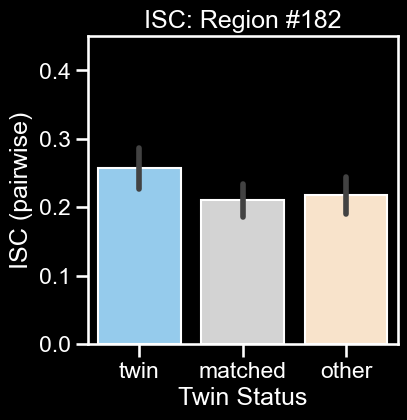

In [7]:
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

current_region_index = 182
#293 is anatomical_similarity


df0 = pd.DataFrame(np.vstack(( iscs_reg_notwin[current_region_index,:], 
                   len(iscs_reg_notwin[current_region_index,:]) * ['other'] )).T, 
                  columns = ['ISC','Twin Status'])

df1 = pd.DataFrame(np.vstack(( iscs_reg_controltwin[current_region_index,:], 
                   len(iscs_reg_controltwin[current_region_index,:]) * ['matched'] )).T, 
                   columns = ['ISC','Twin Status'])

df2 = pd.DataFrame(np.vstack(( iscs_reg_twin[current_region_index,:], 
                   len(iscs_reg_twin[current_region_index,:]) * ['twin'] )).T, 
                   columns = ['ISC','Twin Status'])

result_df = pd.concat([df2, df1, df0])
del df1, df2, df0


result_df['ISC'] = result_df['ISC'].astype('float')

#result_df = pd.read_csv('../data/05_results/twin_isc_df.csv')


plt.figure(figsize =  (4,4))
sns.barplot(data=result_df, 
            x="Twin Status", 
            y="ISC",
            palette = [ 'lightskyblue','lightgrey','bisque']).set(title='ISC: Region #' + str(current_region_index));
plt.ylim([0., 0.45])
plt.ylabel('ISC (pairwise)');

In [8]:
#result_df.to_csv('../data/05_results/twin_isc_df.csv')

In [9]:
iscs_reg_twin.shape

(294, 100)

<Axes: >

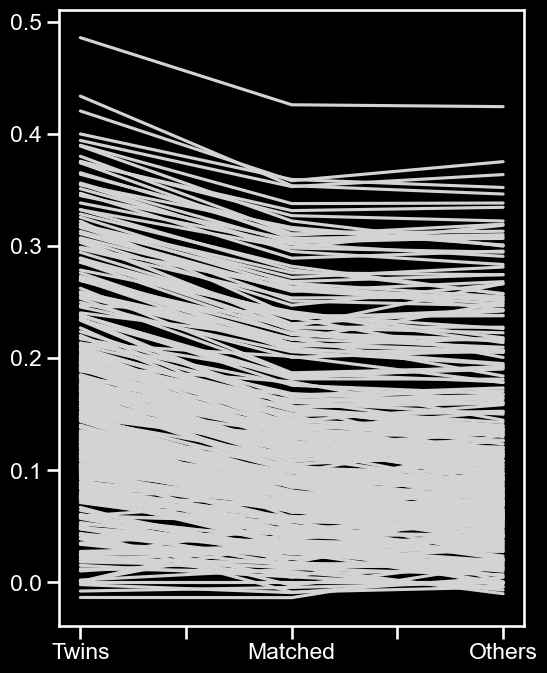

In [10]:
iscs_reg_twin.mean(axis = 1)
df = pd.DataFrame({'Twins': iscs_reg_twin.mean(axis = 1), 
                   'Matched': iscs_reg_controltwin.mean(axis = 1),
                   'Others': iscs_reg_notwin.mean(axis = 1)})
df.sort_values(by='Twins').T.plot(legend = False, color = 'lightgray', figsize = (6,8))